In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
path = "../../../../../submission/sklearn/train_validation/continuous/"

In [3]:
methods = ["decision_tree", "random_forest", "extra_trees",
          "one_vs_rest/decision_tree", "one_vs_rest/random_forest",
          "xgboost"]

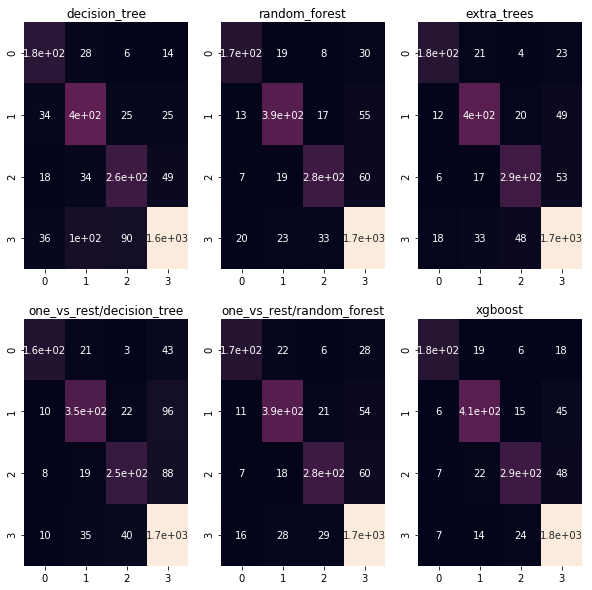

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
list_ax = [it for elem in ax.tolist() for it in elem]
for index,method in enumerate(methods):
    try:
        data = pd.read_csv(os.path.join(path, method, "prediction.csv"), sep=",", header=0)
        confusion_mtx = confusion_matrix(data[["label"]], data[["prediction"]])
        df_cm = pd.DataFrame(confusion_mtx,
                             index = [i for i in range(0,4)],
                             columns = [i for i in range(0,4)])
        sns.heatmap(df_cm, annot=True, ax=list_ax[index], cbar=False)
        list_ax[index].set_title(method)
    except:
        print("{0}: not available".format(method))
        


In [6]:
for index,method in enumerate(methods):
    print("Method: {0}".format(method))
    classifier = pd.read_csv(os.path.join(path, method, "estimators_parameters.csv"), header=0, sep=";")
    results = pd.read_csv(os.path.join(path, method, "results.csv"))
    best_f1 = results[results["f1"] == float(results["f1"].max())]
    print(best_f1.head())
    print("")

Method: decision_tree
    index  accuracy  precision    recall        f1
24     24  0.839609    0.75234  0.802191  0.774464

Method: random_forest
    index  accuracy  precision    recall        f1
75     75  0.894003   0.856175  0.823071  0.838786

Method: extra_trees
    index  accuracy  precision    recall        f1
51     51  0.894003    0.85303  0.838762  0.845705

Method: one_vs_rest/decision_tree
    index  accuracy  precision    recall       f1
18     18  0.862273   0.837597  0.768392  0.79927

Method: one_vs_rest/random_forest
    index  accuracy  precision    recall        f1
18     18  0.895397    0.86074  0.824756  0.841728

Method: xgboost
    index  accuracy  precision    recall        f1
19     19  0.919456   0.897243  0.858913  0.876922



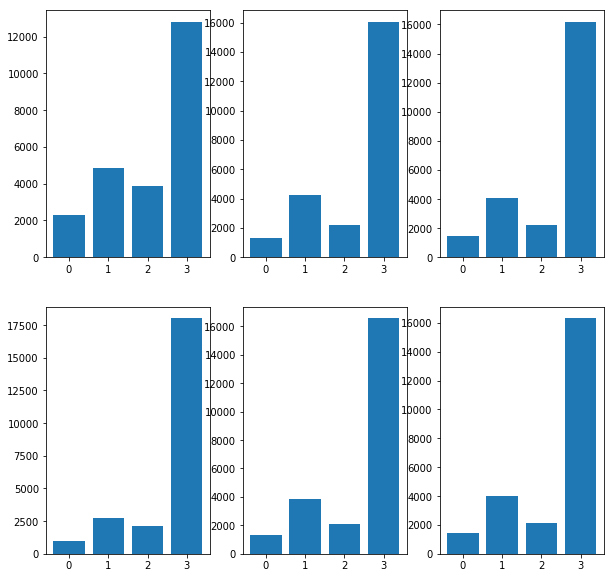

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(10,10))
list_ax = [it for elem in ax.tolist() for it in elem]
for index, method in enumerate(methods):
    submission = pd.read_csv(os.path.join(path, method, "submission.csv"), header=0, sep=",")
    data = submission.groupby(["Target"]).count().to_dict()["Id"].items()
    data.sort(key=lambda p: p[0])
    target = map(lambda p: p[0], data)
    target_count = map(lambda p: p[1], data)
    
    list_ax[index].bar(range(len(target)), target_count)

In [14]:
data

[(1L, 1411L), (2L, 3997L), (3L, 2144L), (4L, 16304L)]